In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [4]:
load_dotenv()

llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [5]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [6]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [7]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [8]:
graph = StateGraph(JokeState)


graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

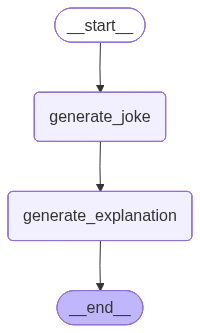

In [9]:
workflow

In [10]:
config1 = {"configurable": {"thread_id":"1"}}
workflow.invoke({'topic': 'santa-banta'}, config = config1)

{'topic': 'santa-banta',
 'joke': 'Okay, here\'s a Santa-Banta joke:\n\nSanta is driving down the highway and gets pulled over by a police officer.\n\nOfficer: "License and registration, please."\n\nSanta fumbles around and hands over his license. The officer examines it and says, "Sir, it says here you need glasses."\n\nSanta: "Oh no, I have contacts."\n\nOfficer: "I don\'t care who you know, you\'re still getting a ticket!"\n\nBanta, who\'s in the passenger seat, leans over and yells, "Santa, you idiot! You\'re wearing your spectacles!"',
 'explanation': 'The humor in this Santa-Banta joke relies on a few layers of wordplay and misunderstanding:\n\n* **"Contacts" Misunderstanding:** The officer is stating that Santa\'s license requires him to wear corrective lenses (glasses). Santa misinterprets "contacts" as referring to his social connections ("who you know"). He thinks the officer is asking if he knows someone who can get him out of the ticket.\n\n* **"I don\'t care who you know..

In [11]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'santa-banta', 'joke': 'Okay, here\'s a Santa-Banta joke:\n\nSanta is driving down the highway and gets pulled over by a police officer.\n\nOfficer: "License and registration, please."\n\nSanta fumbles around and hands over his license. The officer examines it and says, "Sir, it says here you need glasses."\n\nSanta: "Oh no, I have contacts."\n\nOfficer: "I don\'t care who you know, you\'re still getting a ticket!"\n\nBanta, who\'s in the passenger seat, leans over and yells, "Santa, you idiot! You\'re wearing your spectacles!"', 'explanation': 'The humor in this Santa-Banta joke relies on a few layers of wordplay and misunderstanding:\n\n* **"Contacts" Misunderstanding:** The officer is stating that Santa\'s license requires him to wear corrective lenses (glasses). Santa misinterprets "contacts" as referring to his social connections ("who you know"). He thinks the officer is asking if he knows someone who can get him out of the ticket.\n\n* **"I don\'t 

In [12]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'santa-banta', 'joke': 'Okay, here\'s a Santa-Banta joke:\n\nSanta is driving down the highway and gets pulled over by a police officer.\n\nOfficer: "License and registration, please."\n\nSanta fumbles around and hands over his license. The officer examines it and says, "Sir, it says here you need glasses."\n\nSanta: "Oh no, I have contacts."\n\nOfficer: "I don\'t care who you know, you\'re still getting a ticket!"\n\nBanta, who\'s in the passenger seat, leans over and yells, "Santa, you idiot! You\'re wearing your spectacles!"', 'explanation': 'The humor in this Santa-Banta joke relies on a few layers of wordplay and misunderstanding:\n\n* **"Contacts" Misunderstanding:** The officer is stating that Santa\'s license requires him to wear corrective lenses (glasses). Santa misinterprets "contacts" as referring to his social connections ("who you know"). He thinks the officer is asking if he knows someone who can get him out of the ticket.\n\n* **"I don\'t

In [13]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic': 'mobile phone'}, config=config2)

{'topic': 'mobile phone',
 'joke': 'Why did the mobile phone go to therapy?\n\nBecause it had too many unresolved issues... and constantly felt disconnected.',
 'explanation': 'The joke plays on the double meaning of words associated with both mobile phones and mental health:\n\n*   **"Unresolved issues"**: This refers to both problems or bugs in the phone\'s software (common technical issues with phones) and unresolved emotional or psychological problems in a person (a common reason for seeking therapy).\n\n*   **"Disconnected"**: This refers to the phone\'s inability to connect to a network (a technical problem) and the feeling of emotional isolation or lack of connection with others (a common symptom of mental health issues).\n\nThe humor comes from applying human-like feelings and problems to an inanimate object (the mobile phone). We expect people to go to therapy for unresolved issues and feelings of disconnection, but it\'s absurd to imagine a phone doing the same. The joke clev

In [14]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'mobile phone', 'joke': 'Why did the mobile phone go to therapy?\n\nBecause it had too many unresolved issues... and constantly felt disconnected.', 'explanation': 'The joke plays on the double meaning of words associated with both mobile phones and mental health:\n\n*   **"Unresolved issues"**: This refers to both problems or bugs in the phone\'s software (common technical issues with phones) and unresolved emotional or psychological problems in a person (a common reason for seeking therapy).\n\n*   **"Disconnected"**: This refers to the phone\'s inability to connect to a network (a technical problem) and the feeling of emotional isolation or lack of connection with others (a common symptom of mental health issues).\n\nThe humor comes from applying human-like feelings and problems to an inanimate object (the mobile phone). We expect people to go to therapy for unresolved issues and feelings of disconnection, but it\'s absurd to imagine a phone doing the 

In [16]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'mobile phone', 'joke': 'Why did the mobile phone go to therapy?\n\nBecause it had too many unresolved issues... and constantly felt disconnected.', 'explanation': 'The joke plays on the double meaning of words associated with both mobile phones and mental health:\n\n*   **"Unresolved issues"**: This refers to both problems or bugs in the phone\'s software (common technical issues with phones) and unresolved emotional or psychological problems in a person (a common reason for seeking therapy).\n\n*   **"Disconnected"**: This refers to the phone\'s inability to connect to a network (a technical problem) and the feeling of emotional isolation or lack of connection with others (a common symptom of mental health issues).\n\nThe humor comes from applying human-like feelings and problems to an inanimate object (the mobile phone). We expect people to go to therapy for unresolved issues and feelings of disconnection, but it\'s absurd to imagine a phone doing the

Time Travel

In [19]:
workflow.get_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f098723-e9f2-6b32-8000-618d89dedb6e"}})

StateSnapshot(values={'topic': 'mobile phone'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_id': '1f098723-e9f2-6b32-8000-618d89dedb6e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-09-23T11:41:29.279774+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098723-e9df-62b5-bfff-3742806b9d3b'}}, tasks=(PregelTask(id='6722f4d8-d1ab-b9d6-5068-f737cbc6cfba', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the mobile phone go to therapy?\n\nBecause it had too many unresolved issues... and constantly felt disconnected.'}),), interrupts=())

In [20]:
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "1f098723-e9f2-6b32-8000-618d89dedb6e"}})

{'topic': 'mobile phone',
 'joke': 'Why did the mobile phone break up with the charger?\n\nBecause it felt like they were just using each other!',
 'explanation': 'The joke plays on the common phrase "using each other" in the context of a romantic relationship. Here\'s how it works:\n\n* **Literal Meaning:** A mobile phone needs a charger to function (to get power). The charger, in turn, needs a phone to be useful (to deliver power). In this literal sense, they are "using" each other to achieve their respective purposes.\n\n* **Figurative Meaning (Relationship Context):** The phrase "using each other" in a relationship implies that the individuals are not genuinely interested in each other\'s well-being or happiness. Instead, they are only with the other person for personal gain (e.g., money, status, convenience).\n\n* **The Humor:** The joke creates humor by applying the phrase "using each other" to the inanimate objects (phone and charger) as if they were in a relationship.  The phon

In [21]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'mobile phone', 'joke': 'Why did the mobile phone break up with the charger?\n\nBecause it felt like they were just using each other!', 'explanation': 'The joke plays on the common phrase "using each other" in the context of a romantic relationship. Here\'s how it works:\n\n* **Literal Meaning:** A mobile phone needs a charger to function (to get power). The charger, in turn, needs a phone to be useful (to deliver power). In this literal sense, they are "using" each other to achieve their respective purposes.\n\n* **Figurative Meaning (Relationship Context):** The phrase "using each other" in a relationship implies that the individuals are not genuinely interested in each other\'s well-being or happiness. Instead, they are only with the other person for personal gain (e.g., money, status, convenience).\n\n* **The Humor:** The joke creates humor by applying the phrase "using each other" to the inanimate objects (phone and charger) as if they were in a rel

Updating State

In [22]:
workflow.update_state({"configurable": {"thread_id": "2", "checkpoint_id": "1f098723-e9f2-6b32-8000-618d89dedb6e", "checkpoint_ns": ""}}, {'topic':'instagram'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f09877c-1a65-6ef4-8001-d4a45644cc92'}}

In [23]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'instagram'}, next=('generate_joke',), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f09877c-1a65-6ef4-8001-d4a45644cc92'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-09-23T12:20:56.592152+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f098723-e9f2-6b32-8000-618d89dedb6e'}}, tasks=(PregelTask(id='51e32f95-661c-dfa8-e59e-97297edca8a9', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'mobile phone', 'joke': 'Why did the mobile phone break up with the charger?\n\nBecause it felt like they were just using each other!', 'explanation': 'The joke plays on the common phrase "using each other" in the context of a romantic relationship. Here\'s how it works:\n\n* **Literal Meaning:** A mobile phone needs a charger to function (to 

In [24]:
workflow.invoke(None, {"configurable": {"thread_id": "2", "checkpoint_id": "1f09877c-1a65-6ef4-8001-d4a45644cc92"}})

{'topic': 'instagram',
 'joke': 'Why did the Instagram influencer break up with their phone?\n\nBecause they felt like they were being used for likes and validation, and the phone was just constantly asking, "Are you sure you\'re living your best life? Want to buy some filters?"',
 'explanation': 'The joke plays on the stereotypical behavior and anxieties of Instagram influencers, then personifies the phone to highlight those issues. Here\'s a breakdown:\n\n* **Instagram Influencer and Phone Relationship:** The setup establishes an unusual "relationship" between an influencer and their phone. This is already humorous because it hints at the unhealthy dependence many influencers have on their devices.\n\n* **"Used for Likes and Validation":** This is the core of the joke. Influencers often feel pressured to create content solely for the purpose of gaining likes, comments, and followers. This pursuit of external validation can be emotionally draining and lead to feelings of being exploit

In [25]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'instagram', 'joke': 'Why did the Instagram influencer break up with their phone?\n\nBecause they felt like they were being used for likes and validation, and the phone was just constantly asking, "Are you sure you\'re living your best life? Want to buy some filters?"', 'explanation': 'The joke plays on the stereotypical behavior and anxieties of Instagram influencers, then personifies the phone to highlight those issues. Here\'s a breakdown:\n\n* **Instagram Influencer and Phone Relationship:** The setup establishes an unusual "relationship" between an influencer and their phone. This is already humorous because it hints at the unhealthy dependence many influencers have on their devices.\n\n* **"Used for Likes and Validation":** This is the core of the joke. Influencers often feel pressured to create content solely for the purpose of gaining likes, comments, and followers. This pursuit of external validation can be emotionally draining and lead to feeli

Fault Tolerance

In [39]:
#1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [40]:
import time

# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(30)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"step3": "done"}

In [41]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

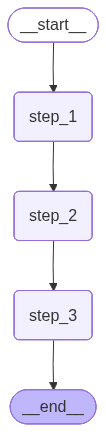

In [42]:
graph

In [47]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
❌ Kernel manually interrupted (crash simulated).


In [48]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)


🔁 Re-running the graph to demonstrate fault tolerance...
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)
✅ Step 3 executed

✅ Final State: {'input': 'start', 'step1': 'done', 'step2': 'done'}


In [49]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0987fd-c45a-6fdc-8012-d723a5d508e8'}}, metadata={'source': 'loop', 'step': 18, 'parents': {}}, created_at='2025-09-23T13:18:57.230844+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0987fd-c45a-6fdb-8011-5605b3db99d0'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0987fd-c45a-6fdb-8011-5605b3db99d0'}}, metadata={'source': 'loop', 'step': 17, 'parents': {}}, created_at='2025-09-23T13:18:57.230844+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0987fa-fa76-6a4e-8010-a5eab7ede0fc'}}, tasks=(PregelTask(id='ec69a45b-f13e-5c26-c398-776e837f5